# DS 422 - Machine Learning Driven Data Analysis I

## Lab 2

**Musabbir Hasan<br>**
*musabbirhasansammak@outlook.com<br>*

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
boston = load_boston()

In [27]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['TARGET'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [39]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

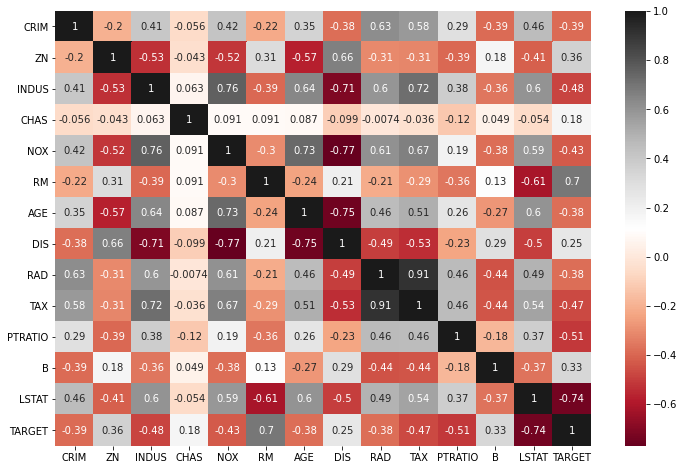

In [11]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy', annot=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, train_size=0.8)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Price')

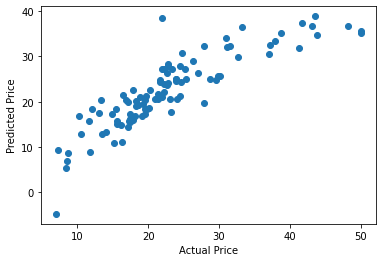

In [44]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.370418670047118
MSE: 21.399145659656423
RMSE: 4.625921060681475


In [46]:
coefficients = pd.DataFrame(lm.coef_, boston.feature_names)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.136625
ZN,0.056238
INDUS,-0.021636
CHAS,3.752002
NOX,-15.629495
RM,3.751563
AGE,-0.005922
DIS,-1.496572
RAD,0.345895
TAX,-0.012938


In [99]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
data = scaler.fit_transform(boston.data)

In [164]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [168]:
data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, boston.target, train_size=0.8)

In [211]:
sgd = SGDRegressor(
    loss = 'squared_loss',
    fit_intercept = True,
    max_iter = 50,
    shuffle = True,
    verbose = 1,
    learning_rate = 'constant',
    eta0 = 0.01
)

In [212]:
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 4.61, NNZs: 13, Bias: 22.042072, T: 404, Avg. loss: 48.637852
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.89, NNZs: 13, Bias: 22.117927, T: 808, Avg. loss: 12.133041
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.22, NNZs: 13, Bias: 22.365176, T: 1212, Avg. loss: 12.097345
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.41, NNZs: 13, Bias: 22.552101, T: 1616, Avg. loss: 11.450975
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.86, NNZs: 13, Bias: 22.757187, T: 2020, Avg. loss: 11.719072
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.13, NNZs: 13, Bias: 22.422089, T: 2424, Avg. loss: 12.138210
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.76, NNZs: 13, Bias: 22.329971, T: 2828, Avg. loss: 11.756721
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.26, NNZs: 13, Bias: 22.500518, T: 3232, Avg. loss: 12.098327
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 6.49, NNZs: 13, Bias: 22.432896, T: 3636, Avg. loss: 11.299000
To

SGDRegressor(learning_rate='constant', max_iter=50, verbose=1)

In [207]:
predictions = sgd.predict(X_test)

In [208]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.7533386142996115
MSE: 31.67838336188674
RMSE: 5.628355298121001
